In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data = pd.read_csv(r"E:\DSML Datasets\cars_dataset.csv")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [7]:
car_data.Fuel_Type.replace({'Petrol':0 , 'Diesel':1 , 'CNG':2} , inplace= True)
car_data.Seller_Type.replace({'Dealer':0 , 'Individual':1} , inplace= True)
car_data.Transmission.replace({'Manual':0 , 'Automatic':1} , inplace= True)

In [8]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [9]:
X = car_data.drop(columns=['Car_Name' , 'Selling_Price'] , axis= 1)
Y = car_data['Selling_Price']

In [10]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.1 , random_state= 2)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train , Y_train)

LinearRegression()

In [15]:
traindata_prediction = model.predict(X_train)

In [17]:
score = metrics.r2_score(Y_train , traindata_prediction)
print("R Squared Error :", score)

R Squared Error : 0.8799451660493708


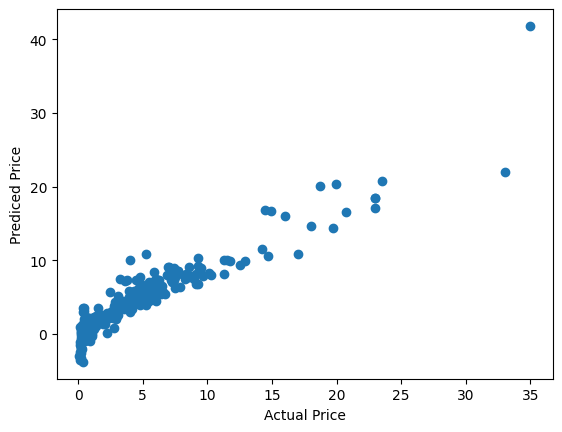

In [18]:
plt.scatter(Y_train , traindata_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Prediced Price")
plt.show()

In [19]:
testdata_prediction = model.predict(X_test)

In [20]:
score = metrics.r2_score(Y_test , testdata_prediction)
print("R Squared Error :" , score)

R Squared Error : 0.8365766715026374


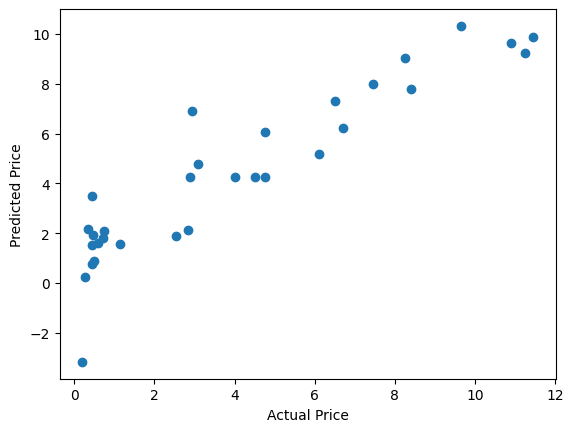

In [21]:
plt.scatter(Y_test , testdata_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [22]:
model = Lasso()

In [23]:
model.fit(X_train , Y_train)

Lasso()

In [24]:
traindata_prediction = model.predict(X_train)

In [26]:
score = metrics.r2_score(Y_train , traindata_prediction)
print("R Score :" , score)

R Score : 0.8427856123435794


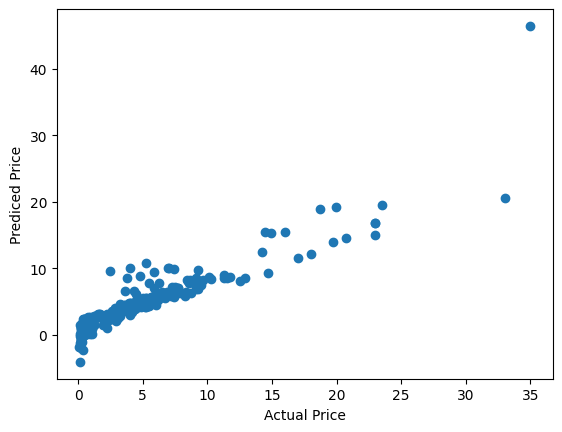

In [27]:
plt.scatter(Y_train , traindata_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Prediced Price")
plt.show()

In [28]:
testdata_prediction = model.predict(X_test)

In [29]:
score = metrics.r2_score(Y_test , testdata_prediction)
print("R Score :", score)

R Score : 0.8709167941173195


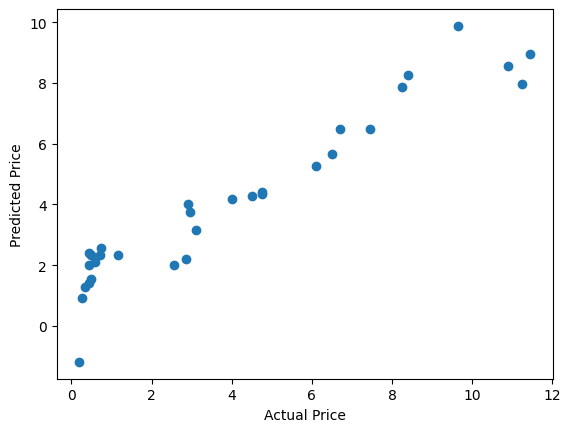

In [30]:
plt.scatter(Y_test , testdata_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()